<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными,-предобработка" data-toc-modified-id="Знакомство-с-данными,-предобработка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными, предобработка</a></span></li><li><span><a href="#Проверка-расчета-эфективности-обогащения" data-toc-modified-id="Проверка-расчета-эфективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эфективности обогащения</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-обучающей-и-тестовой-выборки" data-toc-modified-id="Подготовка-обучающей-и-тестовой-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка обучающей и тестовой выборки</a></span></li><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li></ul></div>

# Проект "Восстановление золота из руды"

**Задача проекта**

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Знакомство с данными, предобработка

Для начала импортируем необходимые библиотеки и алгоритмы.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [49]:
#прочтем файлы с данными, выведем на экран первые 5 строк каждой таблицы для ознакомления: 
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
with pd.option_context('display.max_columns', None):
    display('train:', train.head())
    display('test:', test.head())
    display('full:', full.head())

'train:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'test:'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

'full:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Хочется отметить, что в таблицах разное количество колонок: в  train и full по 87, в  test - 53. 

Для понимания, какие данные содержатся в таблице приведем **описание данных**. 

Технологический процесс

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков
Наименование признаков строится по типу:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

**Оценим пропуски**. 

Выведем на экран общую информацию о таблицах методом info().

In [50]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

Для наглядности приведем таблицу, в которой подсчитаем количество значений в каждой колонке по нашим трем исходным таблицам.

In [53]:
full_count = pd.DataFrame(full.stack().count(1), columns = ['full'])
test_count= pd.DataFrame(test.stack().count(1), columns = ['test'])
train_count = pd.DataFrame(train.stack().count(1), columns = ['train'])
total_count = test_count.join([train_count, full_count], how = 'outer')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(total_count)

,test,train,full
date,5290.0,14149,19439
primary_cleaner.input.sulfate,5286.0,14129,19415
primary_cleaner.input.depressant,5285.0,14117,19402
primary_cleaner.input.feed_size,5290.0,14149,19439
primary_cleaner.input.xanthate,5286.0,14049,19335
primary_cleaner.state.floatbank8_a_air,5290.0,14145,19435
primary_cleaner.state.floatbank8_a_level,5290.0,14148,19438
primary_cleaner.state.floatbank8_b_air,5290.0,14145,19435
primary_cleaner.state.floatbank8_b_level,5290.0,14148,19438
primary_cleaner.state.floatbank8_c_air,5290.0,14147,19437


Из таблицы мы видим, что в тестовой выборке отсутствуют параметры продукта (на выходе), в том числе и  наши целевые признаки: 

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Нам необходимо "достать" эти данные (целевые признаки) из общей таблицы для проверки модели и добавить в тестовую выборку. 

В дальнейшем для цели обучения моделей мы удалим из обучающей выборки остальные признаки, которые отсутствуют в тестовой выборке, так как если мы обучим модель на этих данных, никакого эффекта при проверке на тестовой выборке это не даст. 

Пропуски в данных в тестовой выборке мы удалим, так как заменять теми или иными значениями будет некорректно. Это тестовая выборка и мы ее не видим до конца исследования. В обучающей выборке заполним пропуски методом ffill.

**Добавим целевые признаки в тестовую выборку:**

In [54]:
test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

**Обработаем пропуски в таблицах train и test:**

In [55]:
train = train.ffill()
test = test.dropna()
#для проверки выведем на экран размер таблицы test:
test.shape

(5229, 55)

### Проверка расчета эфективности обогащения

Проверим расчет эффективности обогащения на обучающей выборке для признака `rougher.output.recovery`. Для этого найдем показатель MAE между рассчитанным значением и значением признака. 

Напишем функцию для расчета:

In [56]:
#функция расчета recovery: 
def rec(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    recovery = ((C*(F-T))/(F*(C-T)))*100
    return recovery

In [57]:
#добавим столбец с расчетными значениями в таблицу: 
train['rougher.output.recovery_estimated'] = train.apply(rec, axis=1)

In [58]:
#рассчитаем метрику МАЕ: 
MAE = mean_absolute_error(train['rougher.output.recovery'], train['rougher.output.recovery_estimated'])
MAE

9.682896147825551e-15

Значение среднего абсолютного отклонения между rougher.output.recovery в таблице и rougher.output.recovery рассчетным ничтожно мало. Можем сделать вывод о том, что recovery рассчитан верно. 

**Вывод**

На этапе подготовки данных мы ознакомились с данными и выяснили, что в тестовой выборке отсутствует часть признаков, характеризующих продукт (на выходе), в том числе и целевые признаки (эффективность обогащения чернового концентрата и финального концентрата).  Целевые признаки были добавлены в таблицу, удалены пропуски. 

А также мы проверили расчет эффективности обогащения (признака `rougher.output.recovery`) и сделали вывод о том, что признак рассчитан верно. 

Теперь проанализируем данные. 

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для наглядности построим гистораммы и по ним оценим выбросы на том или ином этапе процесса.

Напишем функцию, которая на вход принимает список с наименованием столбцов, по которым будем строить гистограммы.

In [59]:
def graph(list, bins):
    plt.figure(figsize=(10, 6))
    for i in list:
        plt.hist(train[i], bins = bins)
    plt.xlabel('концентрация')
    plt.ylabel('количество')
    plt.legend(list)
    return plt.show()

Построим графики для этапов очистки золота:

'Au'

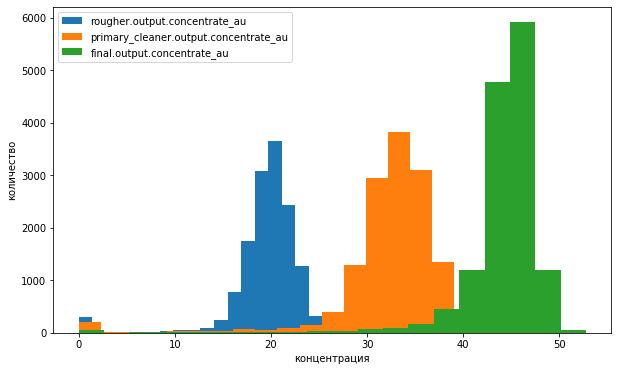

In [60]:
list_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
bins = 20
display("Au")
graph(list_au, bins)

Такой график вполне может соответствовать действительности -  от этапа к этапу конентрация золота увеличивается, за одним исключением: мы наблюдаем часть околонулевых значений на каждом этапе, которые стоят как бы отдельно. Эти выбросы нужно будет удалить из таблицы перед обучением модели. Они могут повлиять на корректность расчетов. 

Графики для этапов очистки серебра:

'Ag'

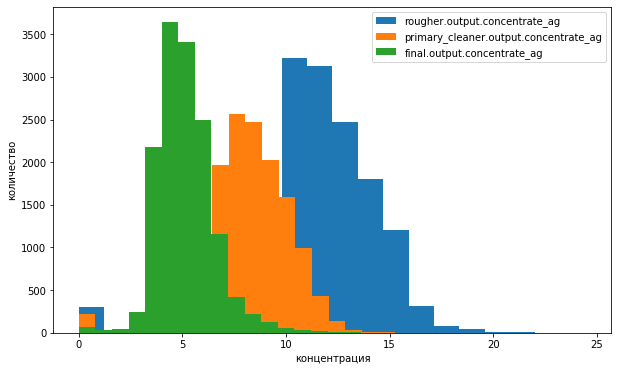

In [61]:
list_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
bins = 20
display("Ag")
graph(list_ag, bins)

Аналогичная ситуация с выбросами "в районе" нуля. 

Графики для этапов очистки свинца:

'Pb'

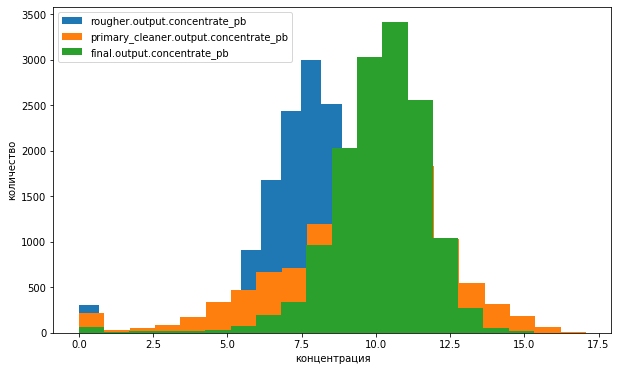

In [62]:
list_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
bins = 20
display("Pb")
graph(list_pb, bins)

Здесь также наблюдаем выбросы около нуля. А также хочется отметить, что если у золота четко выделяется прямая зависимость от этапа: с каждым последующим этапом концентрация золота увеличивается (как, собственно, и должно быть), то у серебра и свинца такой зависимости нет.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Для наглядности построим гистограммы и по ним оценим, насколько отличаются распределения. 

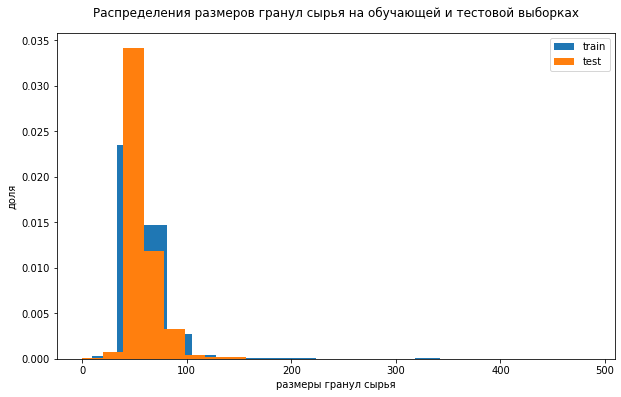

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(train['rougher.input.feed_size'], bins=20, density=True)
plt.hist(test['rougher.input.feed_size'], bins=20, density=True)
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках', pad=16)
plt.xlabel('размеры гранул сырья')
plt.ylabel('доля')
plt.legend(['train','test'])
plt.show()

Распределения похожи, однако у распределения обучающей выборки есть "хвост", которого нет в тесте. От этих выбросов мы должны избавиться перед обучением модели.

### Суммарная концентрацию всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
В таблицах представлены данные о концентрациях золота, серебра, свинца и золи. 

Просуммируем данные по стадиям и построим гистограммы. 

In [64]:
#добавим столбцы с суммой: 
train['rougher.input.feed_sum'] = train[[
    'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol'
]].sum(axis=1)
train['rougher.output.concentrate_sum'] = train[[
    'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'
]].sum(axis=1)
train['final.output.concentrate_sum'] = train[[
    'final.output.concentrate_ag','final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol'
]].sum(axis=1)

'Sum'

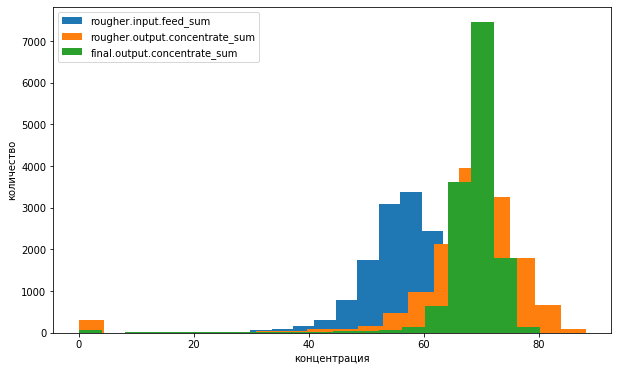

In [66]:
#выведем графики для суммарной концентрации всех веществ на разных стадиях на экран: 
list_sum = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'final.output.concentrate_sum']
display("Sum")
graph(list_sum, bins)

Стоит еще раз упомянуть о нулевых значених, которые могут повлиять на качество нашей модели, их следует удалить. А что касается распределения суммарной концентрации веществ, мы не видим здесь прямой зависимости увеличения концентрации в зависимости от стадии. 

**Вывод**

На этапе анализа данных мы посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, сравнили распределения размеров гранул сырья на обучающей и тестовой выборках, исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Выяснили, что если у золота четко выделяется прямая зависимость концентрации от этапа: с каждым последующим этапом концентрация золота увеличивается (как, собственно, и должно быть), то у серебра и свинца такой зависимости нет. 

Обнаружили "выбросы" в данных- нулевые значения концентраций металлов на разных стадиях и этапах очистки, а также размеров гранул. Распределения размеров гранул сырья на обучающей и тестовой выборках похожи, однако у распределения обучающей выборки есть "хвост" с 0, которого нет в тесте. 

Что касается распределения суммарной концентрации веществ, то прямой зависимости увеличения сумарной концентрации в зависимости от стадии мы не увидели. Возможно, стоит рассмотреть этот признак для обучения модели. 

## Модель

### Подготовка обучающей и тестовой выборки

Посмотрим еще раз на признаки, содержащиеся в тестовой выборке. 

In [67]:
#выведем на экран названия столбцов таблицы test:
test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [68]:
#добавим столбцец с расчетом суммарной концентрации веществ:
test['rougher.input.feed_sum'] = test[[
    'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol'
]].sum(axis=1)

In [69]:
#почистим тестовую выборку от выбросов, которые мы нашли на этапе анализа данных. 
clean_test = test[test['rougher.input.feed_sum'] > 10]

Удалим признаки 'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol', так как rougher.input.feed_au используется в формуле расчета rougher.output.recovery -  это целевой признак, а остальные признаки не относятся к золоту. 

In [70]:
#разделим тестовую выборку на обучающие и целевые признаки: 
features_test = clean_test.drop([
    'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol','date','rougher.output.recovery', 'final.output.recovery'
], axis=1)
target_test_rougher = clean_test['rougher.output.recovery']
target_test_final = clean_test['final.output.recovery']

In [71]:
#подготовим обучающую выборку: 
clean_train = train[train['rougher.input.feed_sum'] > 10]
features_train = clean_train[features_test.columns]
target_train_rougher = clean_train['rougher.output.recovery']
target_train_final = clean_train['final.output.recovery']
#для проверки выведем размер таблицы features_train на экран:
features_train.shape

(14139, 49)

Выборки готовы, теперь нам необходимы функции для вычисления sMAPE. 

### Функция для вычисления итоговой sMAPE

Нам понадобится вычислять значение sMAPE для 2 целевых признаков - это наши метрики качества. 
Запишем функцию для вычисления sMAPE: 

In [72]:
def smape_calc(target, predict):
    smape = np.mean(abs(target - predict)/((abs(target)+abs(predict))/2))*100
    return smape

Введем переменную smape_score для дальнейшей передачи аргументу scoring. 

In [73]:
smape_score = make_scorer(score_func=smape_calc, greater_is_better=False)

Теперь мы готовы к обучению моделей. 

### Обучение моделей

Обучим 2 модели: модель решающего дерева и случайного леса, и подберем оптимальные параметры моделей с помощью модуля GridSearchCV. В качестве метрики качества будем использовать метрику sMAPE.  

РЕШАЮЩЕЕ ДЕРЕВО

In [74]:
#с помощью модуля GridSearchCV подберем оптимальные гиперпараметры модели для вычисления rougher.output.recovery:
model_1 = DecisionTreeRegressor(random_state=1000000)
parametrs_1 = {'max_depth': range (1,10)}
grid_1 = GridSearchCV(model_1, parametrs_1, cv=5, scoring=smape_score)
grid_1.fit(features_train,target_train_rougher)
display(grid_1.best_params_)

{'max_depth': 3}

In [75]:
best_score_DTR_rougher = grid_1.best_score_
best_score_DTR_rougher

-11.344055413838484

In [76]:
#теперь оптимальные параметры для вычисления final.output.recovery: 
grid_1_1 = GridSearchCV(model_1, parametrs_1, cv=5, scoring=smape_score)
grid_1_1.fit(features_train,target_train_final)
display(grid_1_1.best_params_)

{'max_depth': 1}

In [77]:
best_score_DTG_final = grid_1_1.best_score_
best_score_DTG_final

-11.056135682408737

СЛУЧАЙНЫЙ ЛЕС

In [78]:
#с помощью модуля GridSearchCV подберем оптимальные гиперпараметры модели для вычисления rougher.output.recovery:
model_2 = RandomForestRegressor(random_state=1000000)
parametrs_2 = {'n_estimators': range (10, 51, 10),
              'max_depth': range (1,10,2)}
grid_2 = GridSearchCV(model_2, parametrs_2, cv=5, scoring=smape_score)
grid_2.fit(features_train,target_train_rougher)
display(grid_2.best_params_)

{'max_depth': 5, 'n_estimators': 40}

In [79]:
best_score_RFR_rougher = grid_2.best_score_
best_score_RFR_rougher

-10.900251188728515

In [80]:
#теперь оптимальные параметры для вычисления final.output.recovery: 
grid_2_2 = GridSearchCV(model_2, parametrs_2, cv=5, scoring=smape_score)
grid_2_2.fit(features_train,target_train_final)
display(grid_2_2.best_params_)

{'max_depth': 1, 'n_estimators': 30}

In [81]:
best_score_RFR_final = grid_2_2.best_score_
best_score_RFR_final

-10.780280352919938

Наилучший результат показала модель случайного леса с параметрами 'max_depth'= 5 и  'n_estimators'= 40 для rougher и 'max_depth'=1, 'n_estimators'=30 для final.

### Проверка на тестовой выборке

Проверим, как работает модель на тестовой выборке

In [83]:
#найдем метрики smape на тестовой выборке: 
model_rougher = RandomForestRegressor(random_state=1000000, max_depth=5, n_estimators=40)
model_rougher.fit(features_train, target_train_rougher)
predict_test_rougher = model_rougher.predict(features_test)
model_final = RandomForestRegressor(random_state=1000000, max_depth=1, n_estimators=30)
model_final.fit(features_train, target_train_final)
predict_test_final = model_final.predict(features_test)
smape_rougher = smape_calc(target_test_rougher, predict_test_rougher)
smape_final = smape_calc(target_test_final, predict_test_final)
total_smape = (0.25*smape_rougher)  + (0.75*smape_final)
display('sMAPE(rougher) = ', smape_rougher,'sMAPE(final) = ', smape_final, 'Итоговое sMAPE = ', total_smape)

'sMAPE(rougher) = '

10.873217078769407

'sMAPE(final) = '

8.803553114814392

'Итоговое sMAPE = '

9.320969105803146

Итак мы получили модель с симметричным средним процентным отклонением (sMAPE), равным 9,3%.

**Вывод**

Мы обучили и оценили качество с помощью кросс-валидации 2 модели: модель случайного леса и решающего дерева. Наилучший результат показала модель случайного леса с параметрами 'max_depth'= 5 и 'n_estimators'= 40 для rougher и 'max_depth'=1, 'n_estimators'=30 для final.

По параметрам модели мы проверили результат на тестовой выборке и вычислили симметричное среднее процентное отклонениее (sMAPE), равное 18%.

Таким образом результативность нащей модели- более 80%.